# NSFW WARNING : DO NOT WATCH THIS IN PUBLIC

In [29]:
import pandas as pd
import seaborn as sns
from PIL import Image
import aiohttp
import io
import matplotlib.pyplot as plt
import asyncio
import nest_asyncio
from IPython.display import HTML

nest_asyncio.apply()
%matplotlib inline

In [30]:
originalFile = 'pornhub.com-db.csv'

#### Shrink large dataset

In [31]:
# originalDataset = pd.read_csv(originalFile, chunksize=100000, iterator=True, on_bad_lines='skip')
# for idx, chunk in enumerate(originalDataset):
    # chunk.to_csv(f'pornhub.com-db-shrinked{idx}-0.csv', mode='a', header=False, index=False) 

In [32]:
columns = ['embed','thumbnail','thumbnail2','title','tags','categories','pornstars','duration','views','likes','dislikes','thumbnail3','thumbnail4']

In [33]:
# dataset = pd.read_csv('pornhub.com-db-shrinked1-0.csv', delimiter='|', on_bad_lines='skip')
# dataset.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', mode='a', header=False, index=False)

#### Data cleaning & processing

In [35]:
# datasetValidation = [len(dataset.iloc[i].embed.split('|')) == 13 for i in range(len(dataset))]
# dataset = dataset[datasetValidation]

In [36]:
# datasetFixed = pd.DataFrame([dataset.iloc[i].embed.split('|') for i in range(1, len(dataset))], columns=dataset.iloc[0].embed.split('|'))

In [37]:
# datasetFixed.to_csv('pornhub.com-db-shrinked1-0-fixed.csv', index=False, header=True, sep='|')

#### Data quality check

In [38]:
# dataset = pd.read_csv(originalFile, delimiter='|', on_bad_lines='skip', header=None)
# dataset.columns = columns
dataset = pd.read_csv('pornhub.com-db-shrinked1-0-fixed.csv', delimiter='|', on_bad_lines='skip')
len(dataset)

99485

In [39]:
dataset.value_counts();

In [40]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99485 entries, 0 to 99484
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   embed       99485 non-null  object 
 1   thumbnail   99485 non-null  object 
 2   thumbnail2  99485 non-null  object 
 3   title       99485 non-null  object 
 4   tags        99426 non-null  object 
 5   categories  99484 non-null  object 
 6   pornstars   33986 non-null  object 
 7   duration    99485 non-null  int64  
 8   views       99485 non-null  int64  
 9   likes       98529 non-null  float64
 10  dislikes    98529 non-null  float64
 11  thumbnail3  99485 non-null  object 
 12  thumbnail4  99485 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 9.9+ MB


In [41]:
def convertStringDelimiterToList(Row):
    try:
        Row['pornstars']=  Row['pornstars'].split(';')
        Row['tags']=  Row['tags'].split(';')
        Row['categories']=  Row['categories'].split(';')
        return Row
    except AttributeError:
        print(Row)
        raise AttributeError

In [42]:
dropNAN = dataset.dropna(subset=['pornstars', 'tags', 'categories'])

In [43]:
processedDataset = dropNAN.apply(convertStringDelimiterToList, axis=1)

In [44]:
dataset.head()

embed  \
0  <iframe src="https://www.pornhub.com/embed/110...   
1  <iframe src="https://www.pornhub.com/embed/641...   
2  <iframe src="https://www.pornhub.com/embed/639...   
3  <iframe src="https://www.pornhub.com/embed/465...   
4  <iframe src="https://www.pornhub.com/embed/101...   

                                           thumbnail  \
0  https://di.phncdn.com/videos/201312/29/2142343...   
1  https://di.phncdn.com/videos/201312/30/2142671...   
2  https://di.phncdn.com/videos/201312/30/2142698...   
3  https://di.phncdn.com/videos/201312/30/2142729...   
4  https://di.phncdn.com/videos/201312/30/2142736...   

                                          thumbnail2  \
0  https://di.phncdn.com/videos/201312/29/2142343...   
1  https://di.phncdn.com/videos/201312/30/2142671...   
2  https://di.phncdn.com/videos/201312/30/2142698...   
3  https://di.phncdn.com/videos/201312/30/2142729...   
4  https://di.phncdn.com/videos/201312/30/2142736...   

                                               title  \
0                    Sexy teen fucked by her masseur   
1                       Fisting in her pussy and ass   
2                                   fuck blonde girl   
3                                 classic hairi fuck   
4  Sexy teen Mai Marie goes to town on her pussy ...   

                                                tags  \
0  teenmegaworld;teens;young;tricky-masseur;blond...   
1  filthyandfisting;european;girl-on-girl;lesbian...   
2  theclassicporn;classic;retro;cum-shot;orgasm;v...   
3  theclassicporn;classic;retro;cumshot;big-nippl...   
4  vstroker.com;dildo;blonde;small-tits;natural-t...   

                                          categories  \
0             Pornstar;Teen (18+);Small Tits;Massage   
1                               Fisting;Lesbian;Euro   
2  Big Tits;Blonde;Cumshot;Hardcore;MILF;Pornstar...   
3         Big Dick;Big Tits;Cumshot;Pornstar;Vintage   
4              Masturbation;Toys;Pornstar;Teen (18+)   

                              pornstars  duration   views  likes  dislikes  \
0                            Milana Fox       406  336754  526.0     211.0   
1                             Bonny Bon       886   17474   48.0      15.0   
2                           mike horner       654   28875   82.0      11.0   
3  Nikki Knight;nikki knights;Tom Byron       367   80005  208.0      41.0   
4                             Mai Marie       483  182507  829.0      79.0   

                                          thumbnail3  \
0  https://di.phncdn.com/videos/201312/29/2142343...   
1  https://di.phncdn.com/videos/201312/30/2142671...   
2  https://di.phncdn.com/videos/201312/30/2142698...   
3  https://di.phncdn.com/videos/201312/30/2142729...   
4  https://di.phncdn.com/videos/201312/30/2142736...   

                                          thumbnail4  
0  https://di.phncdn.com/videos/201312/29/2142343...  
1  https://di.phncdn.com/videos/201312/30/2142671...  
2  https://di.phncdn.com/videos/201312/30/2142698...  
3  https://di.phncdn.com/videos/201312/30/2142729...  
4  https://di.phncdn.com/videos/201312/30/2142736...

In [45]:
dataset.describe()

duration         views          likes       dislikes
count  99485.000000  9.948500e+04   98529.000000   98529.000000
mean     553.423210  2.662028e+05     645.428909     207.582630
std      470.676052  1.205564e+06    2982.663299    1107.743995
min        1.000000  1.000000e+00       0.000000       0.000000
25%      315.000000  8.007000e+03      27.000000       7.000000
50%      453.000000  4.482800e+04     118.000000      35.000000
75%      650.000000  1.753190e+05     416.000000     120.000000
max    16271.000000  1.391353e+08  460880.000000  165818.000000

In [46]:
# giving one row to the parameter will return networked images
async def networkImage(Row, title="", disable=False):
    imageFolder = []

    async def requestImage(imageUrl):
        async with aiohttp.ClientSession() as session:
            async with session.get(imageUrl) as response:
                return await response.read()

    plt.rcParams["figure.figsize"] = (14, 10)
    # We want to assure than there are only 25 plots
    count = 1
    try:
        # Loop through thumbnail 1,2,3,4
        for idx in range(1, 5):
            # there is no 'thumbnail1', it's just 'thumbnail'
            if idx == 1:
                idx = ''
            # If thumbnail does not exists, continue
            if Row[f'thumbnail{idx}'] is None:
                continue
            # Convert from pandas series title to title
            # If it fails, just leave it
            try:
                Thumbnail = Row[f'thumbnail{idx}'].values[0]
            except AttributeError:
                Thumbnail = Row[f'thumbnail{idx}']

            imageFolder.append(Thumbnail.split(';'))


            # Request the all the image inside the thumbnail
        tasks = [[asyncio.create_task(requestImage(imageUrl)) for imageUrl in imageUrls] for imageUrls in imageFolder]
        imgsIO = [await asyncio.gather(*task) for task in tasks]

        # Process the images
        for album in imgsIO:
            for img in album:
                img = Image.open(io.BytesIO(img))
                plt.subplot(5, 5, count)
                plt.imshow(img)
                count += 1
                
                # If it printed more than 25 images, break the loop
                if count >= 25:
                    raise StopIteration
    except StopIteration:
        pass
    if not disable:
        plt.suptitle(title)
    plt.rcParams["figure.figsize"] = (6, 4)
    plt.plot()
    plt.show()

In [47]:
# Used to request multiple row images
async def reqMultipleImage(rows):
    for _, row in rows.iterrows():
        await networkImage(row, row['title'])

# General Analysis

The most viewed porn

In [48]:
mostViewed = dataset[dataset['likes'] == dataset['likes'].max()]
mostViewed

embed  \
4801  <iframe src="https://www.pornhub.com/embed/164...   

                                              thumbnail  \
4801  https://di.phncdn.com/videos/201402/27/2379386...   

                                             thumbnail2        title  \
4801  https://di.phncdn.com/videos/201402/27/2379386...  fucking hot   

                                                   tags  \
4801  busty;big-boobs;ass;tight;body;pornstar;pussy-...   

                                             categories  \
4801  Big Ass;Babe;Big Dick;Big Tits;Pornstar;Popula...   

                         pornstars  duration      views     likes  dislikes  \
4801  Bruce Venture;Holly Michaels      1324  139135270  460880.0  165818.0   

                                             thumbnail3  \
4801  https://di.phncdn.com/videos/201402/27/2379386...   

                                             thumbnail4  
4801  https://di.phncdn.com/videos/201402/27/2379386...

Thumbnail of most viewed porn

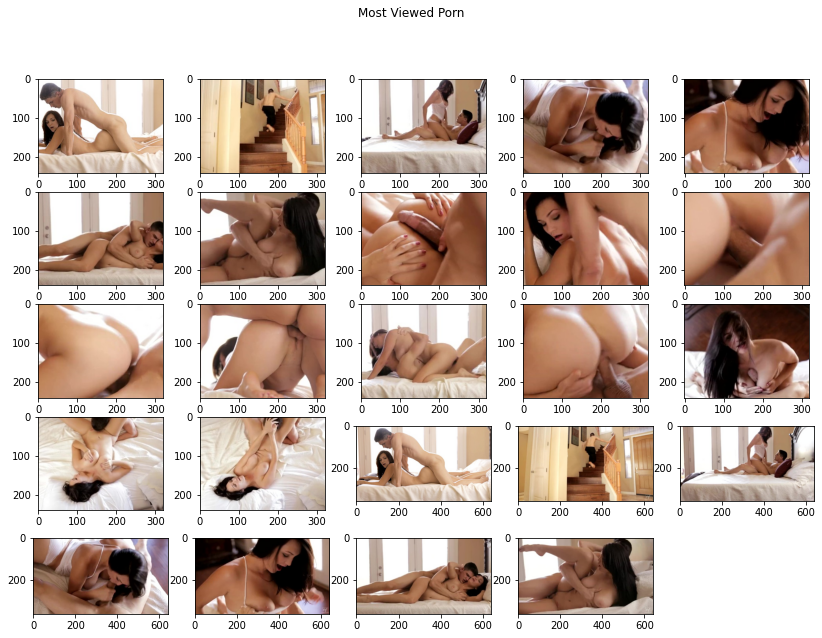

In [49]:
asyncio.run(networkImage(mostViewed, 'Most Viewed Porn'))

#### Video of most viewed porn

In [50]:
HTML(mostViewed['embed'].values[0])

C:\Users\bigma\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### The most liked porn

In [51]:
dataset[dataset['likes'] == dataset['likes'].max()]

embed  \
4801  <iframe src="https://www.pornhub.com/embed/164...   

                                              thumbnail  \
4801  https://di.phncdn.com/videos/201402/27/2379386...   

                                             thumbnail2        title  \
4801  https://di.phncdn.com/videos/201402/27/2379386...  fucking hot   

                                                   tags  \
4801  busty;big-boobs;ass;tight;body;pornstar;pussy-...   

                                             categories  \
4801  Big Ass;Babe;Big Dick;Big Tits;Pornstar;Popula...   

                         pornstars  duration      views     likes  dislikes  \
4801  Bruce Venture;Holly Michaels      1324  139135270  460880.0  165818.0   

                                             thumbnail3  \
4801  https://di.phncdn.com/videos/201402/27/2379386...   

                                             thumbnail4  
4801  https://di.phncdn.com/videos/201402/27/2379386...

#### The most disliked porn

In [52]:
dataset[dataset['likes'] == dataset['likes'].max()]

embed  \
4801  <iframe src="https://www.pornhub.com/embed/164...   

                                              thumbnail  \
4801  https://di.phncdn.com/videos/201402/27/2379386...   

                                             thumbnail2        title  \
4801  https://di.phncdn.com/videos/201402/27/2379386...  fucking hot   

                                                   tags  \
4801  busty;big-boobs;ass;tight;body;pornstar;pussy-...   

                                             categories  \
4801  Big Ass;Babe;Big Dick;Big Tits;Pornstar;Popula...   

                         pornstars  duration      views     likes  dislikes  \
4801  Bruce Venture;Holly Michaels      1324  139135270  460880.0  165818.0   

                                             thumbnail3  \
4801  https://di.phncdn.com/videos/201402/27/2379386...   

                                             thumbnail4  
4801  https://di.phncdn.com/videos/201402/27/2379386...

#### Average Likes Vs Dislikes

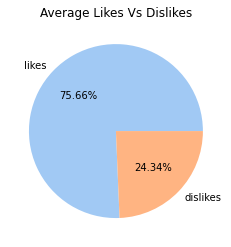

In [57]:
likes, dislikes = dataset['likes'], dataset['dislikes']
data = [likes.mean(), dislikes.mean()]
labels = ['likes', 'dislikes']
colors = sns.color_palette('pastel', 2)
plt.pie(data, labels=labels, colors=colors, autopct='%1.2f%%')
plt.title('Average Likes Vs Dislikes');

#### Linear Relationship Between Each Variables

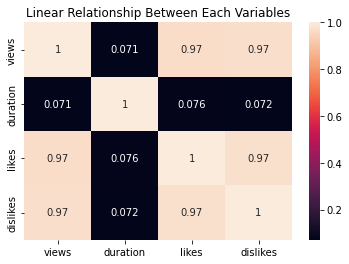

In [59]:
plot = sns.heatmap(dataset[['views', 'duration', 'likes', 'dislikes']].corr(), annot=True)
plot.set_title('Linear Relationship Between Each Variables');

In [90]:
sns.pairplot(dataset[['views', 'duration', 'likes', 'dislikes']]);

# Pornstars

#### Number of pornstars in the dataset

In [63]:
numVideoShotByPornstar = processedDataset.explode('pornstars')['pornstars']
numPornstars = len(numVideoShotByPornstar.unique())
f"There are {numPornstars} number of pornstars in the dataset"

'There are 6246 number of pornstars in the dataset'

#### Top 10 pornstars who shot the most porn

Text(0.5, 1.0, 'Top 10 pornstars who shot the most porn')

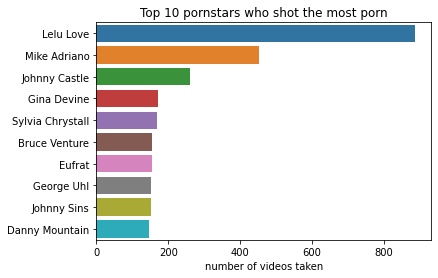

In [64]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).head(10)
nVideoByPornstar.columns = ['number of videos taken']
plot = sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index)
plot.set_title('Top 10 pornstars who shot the most porn')

#### Top 10 pornstars who shot the least porn

Text(0.5, 1.0, 'Top 10 pornstars who shot the least porn')

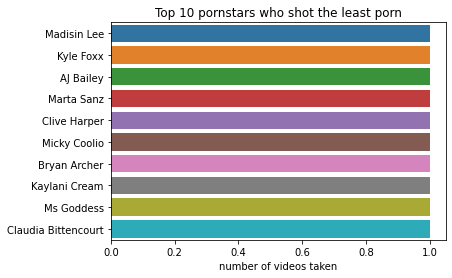

In [65]:
nVideoByPornstar = pd.DataFrame(numVideoShotByPornstar.value_counts()).tail(10)
nVideoByPornstar.columns = ['number of videos taken']
plot = sns.barplot(x=nVideoByPornstar['number of videos taken'], y=nVideoByPornstar.index)
plot.set_title('Top 10 pornstars who shot the least porn');

#### Top 10 Cumulative Porn Views By Pornstar (Top 10 Total Porn Views By Pornstar)

Text(0.5, 1.0, 'Top 10 Cumulative Porn Views By Pornstar (Top 10 Total Porn Views By Pornstar)')

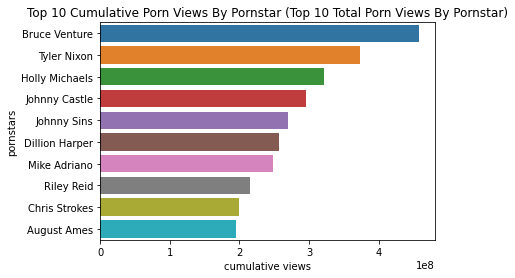

In [66]:
pornstarByVideoViews = processedDataset.explode('pornstars').groupby('pornstars')['views'].sum()
top10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).head(10)
top10PornstarByVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=top10PornstarByVideoViews['cumulative views'], y=top10PornstarByVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Pornstar (Top 10 Total Porn Views By Pornstar)');

#### 10 Least Cumulative Porn Views By Pornstar (Least 10 Total Porn Views By Pornstar)

Text(0.5, 1.0, '10 Least Cumulative Porn Views By Pornstar')

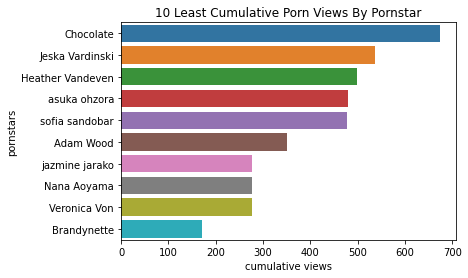

In [67]:
least10PornstarByVideoViews = pd.DataFrame(pornstarByVideoViews).sort_values(by='views', ascending=False).tail(10)
least10PornstarByVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=least10PornstarByVideoViews['cumulative views'], y=least10PornstarByVideoViews.index)
plot.set_title('10 Least Cumulative Porn Views By Pornstar');

#### Top 10 Videos From The Most Popular Pornstar

Text(0.5, 1.0, 'Top 10 Videos From The Most Popular Pornstar')

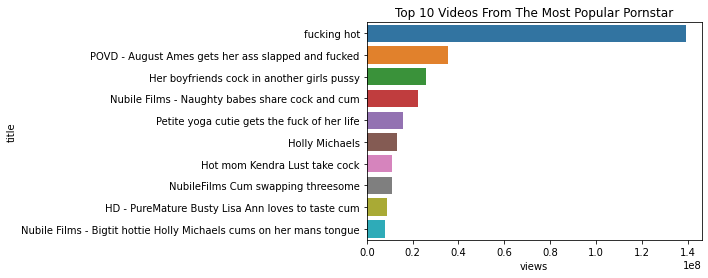

In [68]:
mostPopularPornstar = top10PornstarByVideoViews.sort_values(by=['cumulative views'], ascending=False).index[0]
filterPornstar = processedDataset.apply(lambda x: True if mostPopularPornstar in x['pornstars'] else False, axis=1)
filterPornstar = processedDataset[filterPornstar]
sortedFilterPornstar = filterPornstar.sort_values(by='views', ascending=False).head(10)
plot = sns.barplot(x=sortedFilterPornstar['views'], y=sortedFilterPornstar['title'])
plot.set_title('Top 10 Videos From The Most Popular Pornstar');

#### The Most Viewed Video's Thumbnails From The Most Popular Pornstar

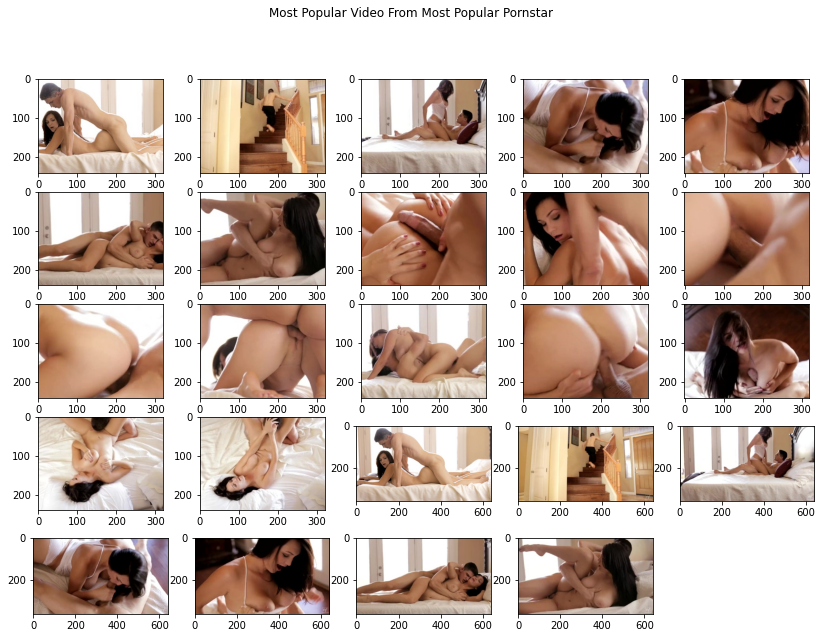

In [69]:
explodedDataset = processedDataset.explode('pornstars')
mostPopularVidFromMostPopularPornstar = explodedDataset.apply(lambda x: True 
            if x['title'] == sortedFilterPornstar['title'].values[0] and x['pornstars'] == mostPopularPornstar else False, axis=1)
mostPopularVidFromMostPopularPornstar = explodedDataset[mostPopularVidFromMostPopularPornstar]
if len(mostPopularVidFromMostPopularPornstar):
    asyncio.run(networkImage(mostPopularVidFromMostPopularPornstar, 'Most Popular Video From Most Popular Pornstar'))

#### Average Porn Views Per Video of The Top 10 Popular Pornstar

In [70]:
def matchMoreThanOnePornstar(firstList, secondList):
    for pornstar in firstList:
        if pornstar in secondList:
            return True
    return False

Text(0.5, 1.0, 'Average Porn Views Per Video of The Top 10 Popular Pornstar')

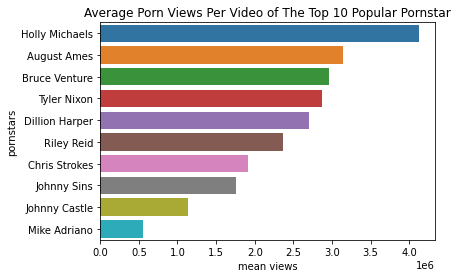

In [71]:
top10PopularPornstar = top10PornstarByVideoViews.index
explodedDataset = processedDataset.explode('pornstars')
filterTop10PopularPornstar = explodedDataset.apply(lambda x: 
                                                        True if matchMoreThanOnePornstar(top10PopularPornstar, x['pornstars']) else False, axis=1)
filterTop10PopularPornstar = explodedDataset[filterTop10PopularPornstar].groupby('pornstars')['views'].mean()
meanViewsOfTop10PopularPornstar = pd.DataFrame(filterTop10PopularPornstar)
meanViewsOfTop10PopularPornstar.columns = ['mean views']
meanViewsOfTop10PopularPornstar = meanViewsOfTop10PopularPornstar.sort_values(by='mean views',ascending=False)
plot = sns.barplot(x=meanViewsOfTop10PopularPornstar['mean views'], y=meanViewsOfTop10PopularPornstar.index)
plot.set_title('Average Porn Views Per Video of The Top 10 Popular Pornstar');

# Porn Tags

#### Number of Unique Porn Tags In The Dataset

In [72]:
dropNoTagVideo = dataset.dropna(subset=['tags'])
splitTagsFromVideo=dropNoTagVideo['tags'].map(lambda x: x.split(';'))
PopularPornTagUploads = splitTagsFromVideo.explode('tags')
numPornTags = len(PopularPornTagUploads.unique())
f"There are {numPornTags} unique Porn tags"

'There are 42134 unique Porn tags'

#### Top 10 Popular Porn Tag Uploads

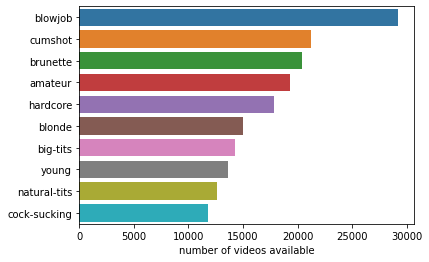

In [73]:
nTopVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).head(10)
nTopVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nTopVideoUploadsByTags['number of videos available'], y=nTopVideoUploadsByTags.index);

#### Least 10 Porn Tag Uploads

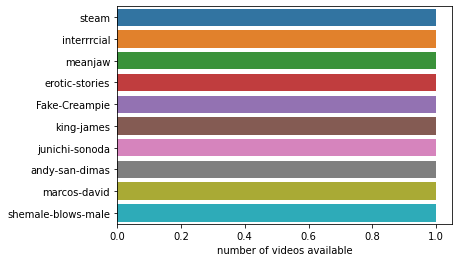

In [74]:
nLowestVideoUploadsByTags = pd.DataFrame(PopularPornTagUploads.value_counts()).tail(10)
nLowestVideoUploadsByTags.columns = ['number of videos available']
sns.barplot(x=nLowestVideoUploadsByTags['number of videos available'], y=nLowestVideoUploadsByTags.index);

#### Top 10 Cumulative Porn Views By Tags (Top 10 Total Porn Views By Tags)

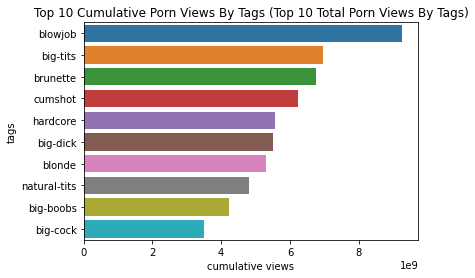

In [75]:
tagsByTopVideoCumulativeViews = processedDataset.explode('tags').groupby('tags')['views'].sum()
top10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).head(10)
top10tagsByCumulativeVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=top10tagsByCumulativeVideoViews['cumulative views'], y=top10tagsByCumulativeVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Tags (Top 10 Total Porn Views By Tags)');

#### Top 5 Most Popular Video's Thumbnails From The Most Popular Tag

In [76]:
mostPopularTag = top10tagsByCumulativeVideoViews.sort_values(by='cumulative views', ascending=False).head(1).index
explodedDataset = processedDataset.explode('tags')

# Filter the dataset to get the videos that have the most popular tag
mostPopularVidFromMostPopularTag = explodedDataset.apply(lambda x: True if x['tags'] == mostPopularTag else False, axis=1)
mostPopularVidFromMostPopularTagWithOutDuplicates = explodedDataset[mostPopularVidFromMostPopularTag].drop_duplicates(subset=['title'])
# Sort the videos by views and get the top 5 videos
top5VidFromMostPopularTagWithOutDuplicates = mostPopularVidFromMostPopularTagWithOutDuplicates.sort_values(by='views', ascending=False).head(5)

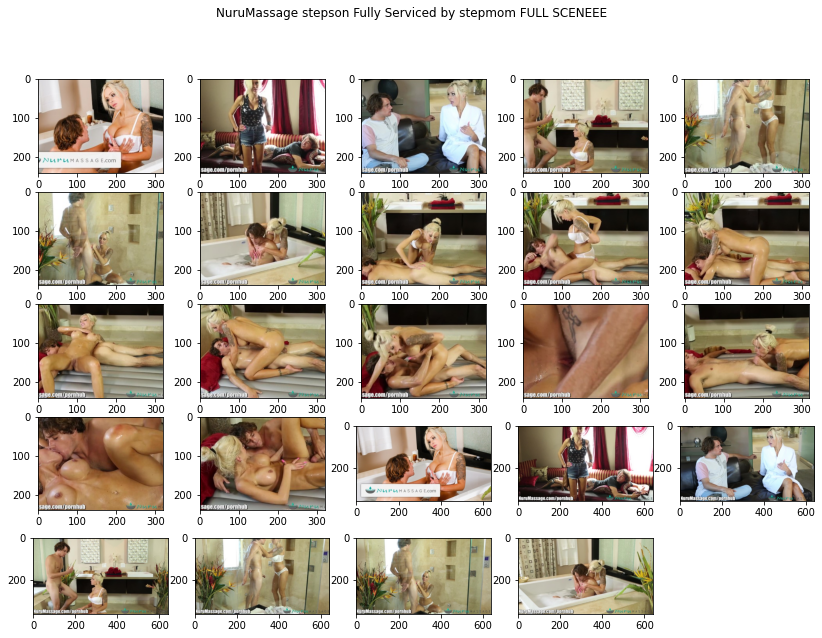

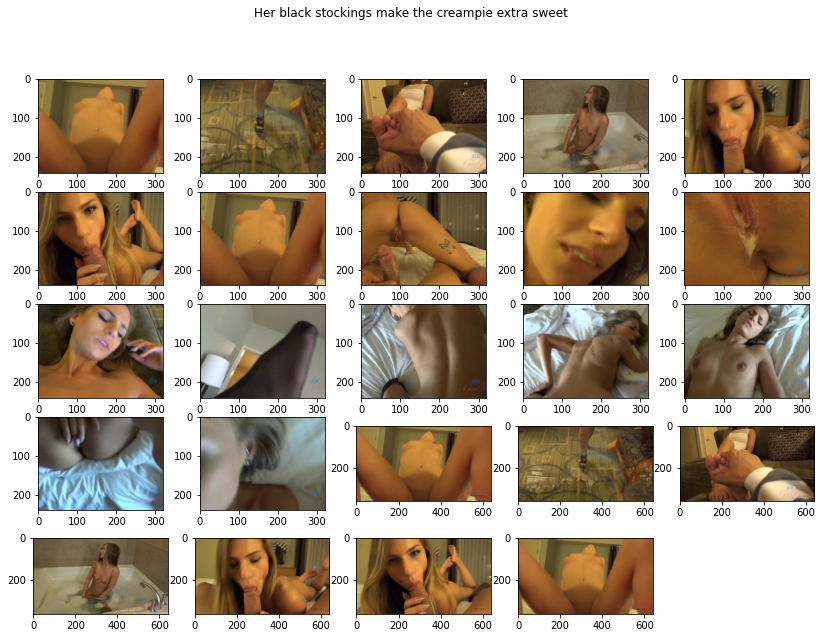

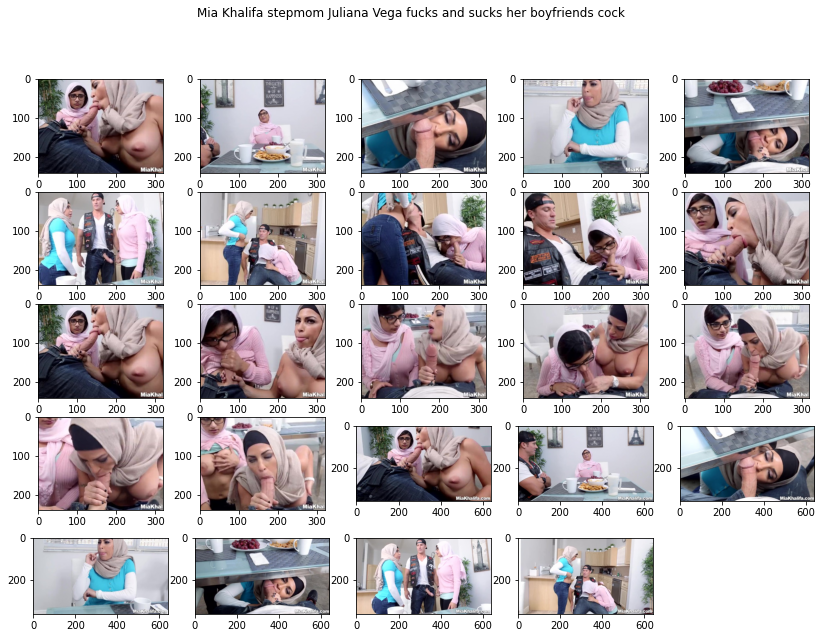

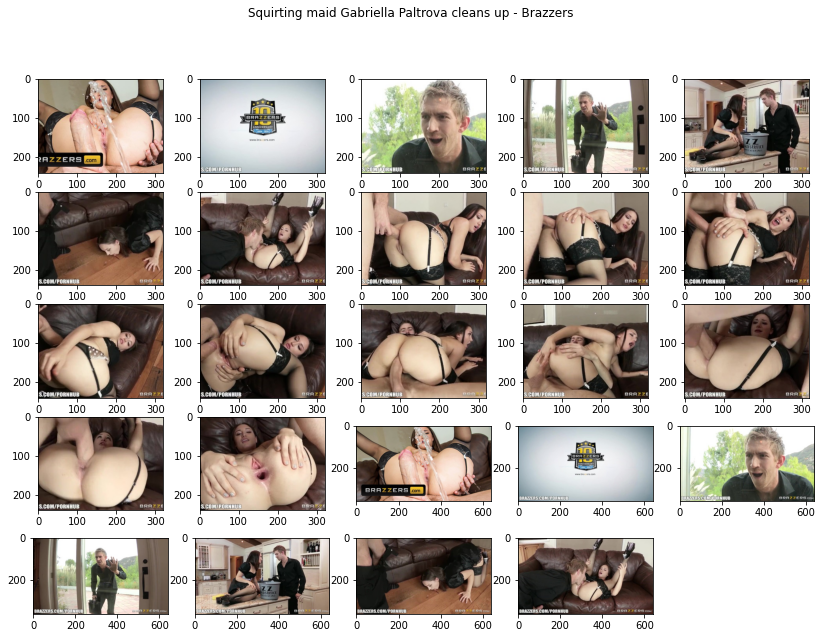

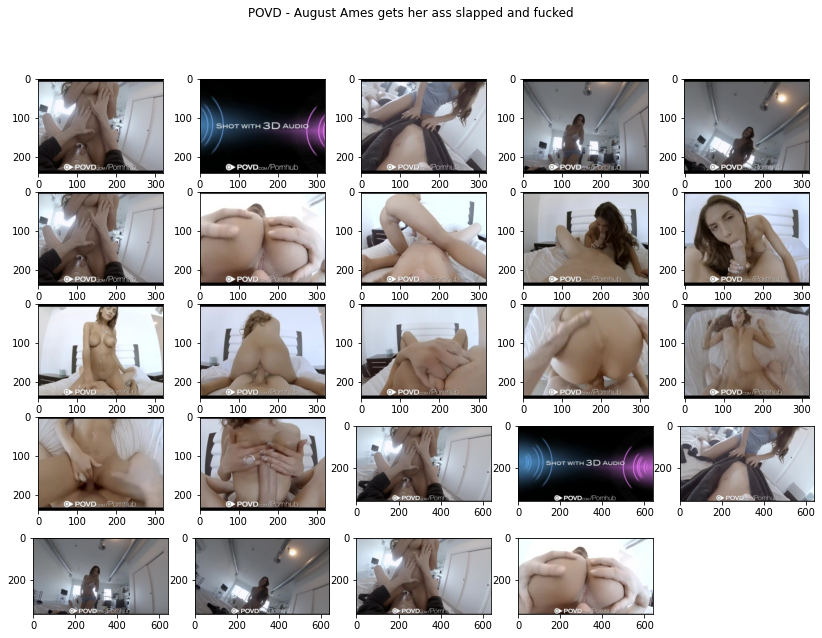

In [77]:
# Iterate over the top 5 videos and display thumbnails
asyncio.run(reqMultipleImage(top5VidFromMostPopularTagWithOutDuplicates))

#### Top 5 Most Popular Videos From The Most Popular Tag

In [78]:
HTML(''.join([row['embed'] for _, row in top5VidFromMostPopularTagWithOutDuplicates.iterrows()]))

C:\Users\bigma\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### 10 Lowest Cumulative Porn Views By Tags (Least 10 Total Porn Views By Tags)

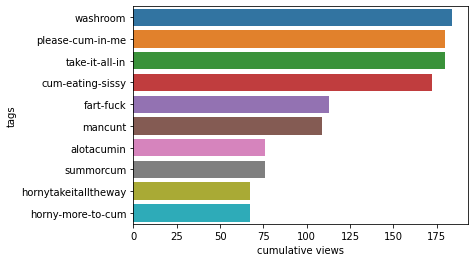

In [79]:
least10tagsByCumulativeVideoViews = pd.DataFrame(tagsByTopVideoCumulativeViews).sort_values(by='views', ascending=False).tail(10)
least10tagsByCumulativeVideoViews.columns = ['cumulative views']
sns.barplot(x=least10tagsByCumulativeVideoViews['cumulative views'], y=least10tagsByCumulativeVideoViews.index);

# Porn Categories

#### Number of Unique Porn Categories In The Dataset

In [80]:
dropNoCategoriesVideo = dataset.dropna(subset=['categories'])
splitCategoriesFromVideo=dropNoCategoriesVideo['categories'].map(lambda x: x.split(';'))
PopularPornCategoryUploads = splitCategoriesFromVideo.explode('categories')
numPornCategories = len(PopularPornCategoryUploads.unique())
f"There are {numPornCategories} Unique Porn Categories"

'There are 122 Unique Porn Categories'

#### Top 10 Popular Porn Category Uploads

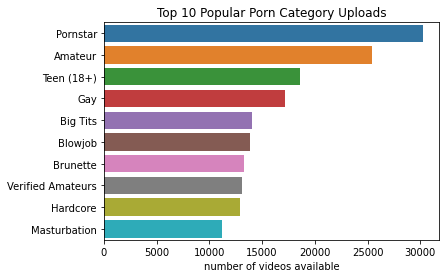

In [81]:
nTopVideoUploadsByCategories = pd.DataFrame(PopularPornCategoryUploads.value_counts()).head(10)
nTopVideoUploadsByCategories.columns = ['number of videos available']
plot = sns.barplot(x=nTopVideoUploadsByCategories['number of videos available'], y=nTopVideoUploadsByCategories.index)
plot.set_title('Top 10 Popular Porn Category Uploads');

#### Least 10 Porn Category Uploads

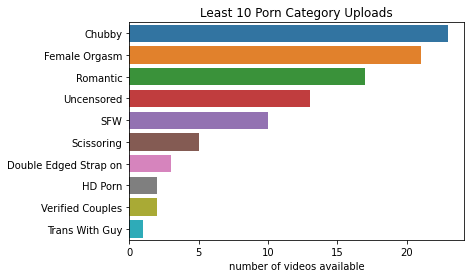

In [82]:
nLeastVideoUploadsByCategories = pd.DataFrame(PopularPornCategoryUploads.value_counts()).tail(10)
nLeastVideoUploadsByCategories.columns = ['number of videos available']
plot = sns.barplot(x=nLeastVideoUploadsByCategories['number of videos available'], y=nLeastVideoUploadsByCategories.index);
plot.set_title('Least 10 Porn Category Uploads');

#### Top 10 Cumulative Porn Views By Categories (Top 10 Total Porn Views By Categories)

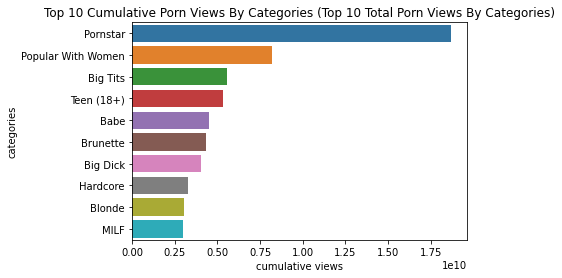

In [83]:
categoriesByTopVideoCumulativeViews = processedDataset.explode('categories').groupby('categories')['views'].sum()
top10CategoriesByCumulativeVideoViews = pd.DataFrame(categoriesByTopVideoCumulativeViews).sort_values(by='views', ascending=False).head(10)
top10CategoriesByCumulativeVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=top10CategoriesByCumulativeVideoViews['cumulative views'], y=top10CategoriesByCumulativeVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Categories (Top 10 Total Porn Views By Categories)');

#### 10 Least Cumulative Porn Views By Categories (Least 10 Total Porn Views By Categories)

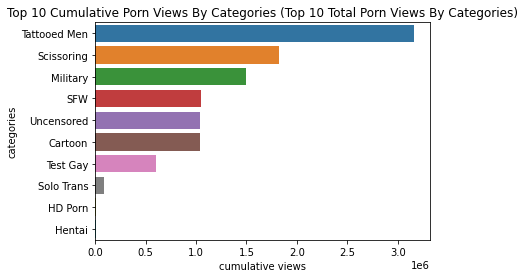

In [84]:
least10CategoriesByVideoViews = pd.DataFrame(categoriesByTopVideoCumulativeViews).sort_values(by='views', ascending=False).tail(10)
least10CategoriesByVideoViews.columns = ['cumulative views']
plot = sns.barplot(x=least10CategoriesByVideoViews['cumulative views'], y=least10CategoriesByVideoViews.index)
plot.set_title('Top 10 Cumulative Porn Views By Categories (Top 10 Total Porn Views By Categories)');

#### What Kind of Tags Are Associated With "Popular With Women" (Type Categories Sorted By Views)

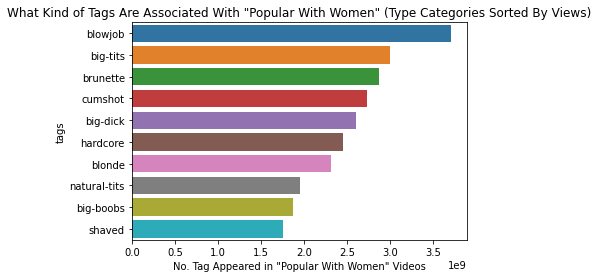

In [85]:
explodedDataset = processedDataset.explode('categories')
PopularWithWomenConnection = explodedDataset[explodedDataset['categories'] == 'Popular With Women']
PopularWithWomenTags = PopularWithWomenConnection.explode('tags')[['tags', 'views']]
PopularWithWomenTagCount = PopularWithWomenTags.groupby('tags').sum()
sortedPopularWithWomenTagCount = PopularWithWomenTagCount.sort_values(by=['views'],ascending=False).head(10)
sortedPopularWithWomenTagCount = pd.DataFrame(sortedPopularWithWomenTagCount)
sortedPopularWithWomenTagCount.columns = ['No. Tag Appeared in "Popular With Women" Videos']
plot = sns.barplot(y=sortedPopularWithWomenTagCount.index, x=sortedPopularWithWomenTagCount['No. Tag Appeared in "Popular With Women" Videos'])
plot.set_title('What Kind of Tags Are Associated With "Popular With Women" (Type Categories Sorted By Views)');

#### Top 5 Video Thumbnails That had The Highest Views In "Popular With Women" Category

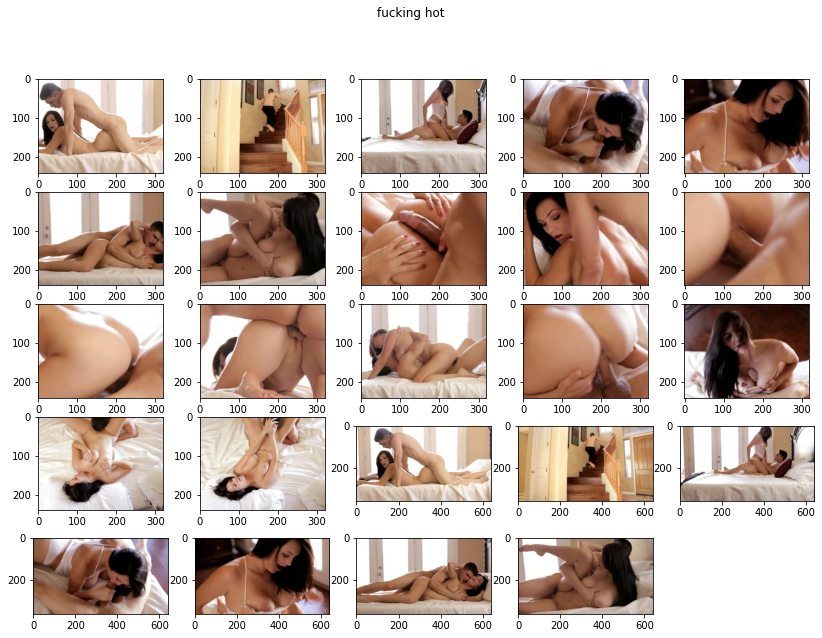

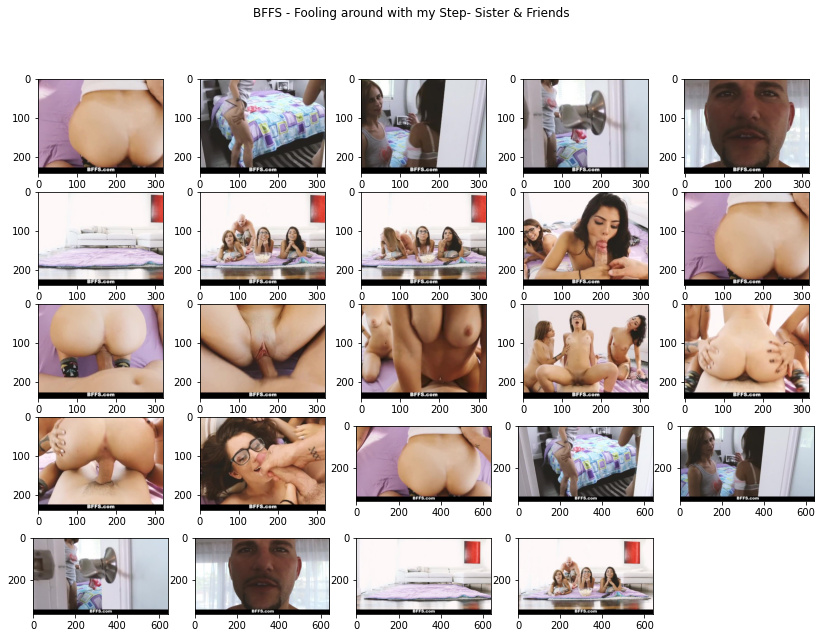

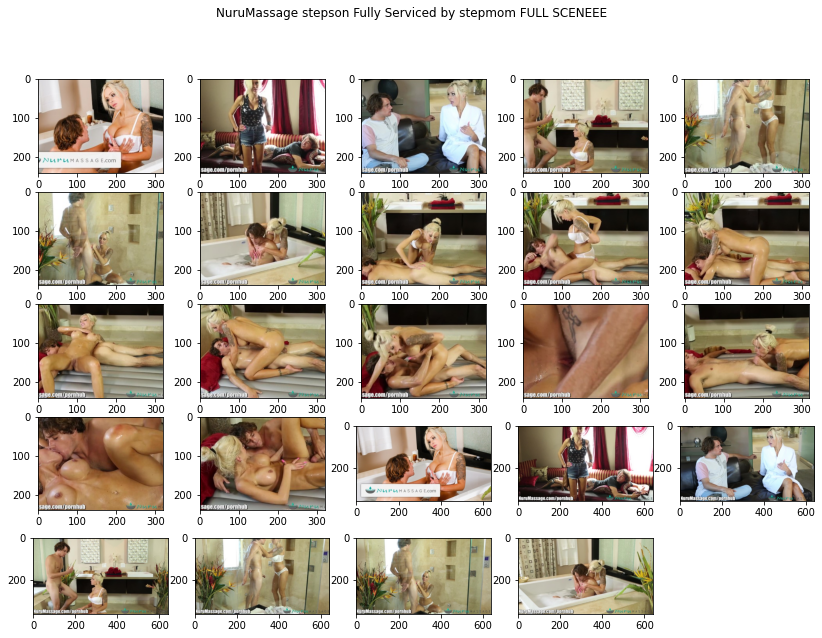

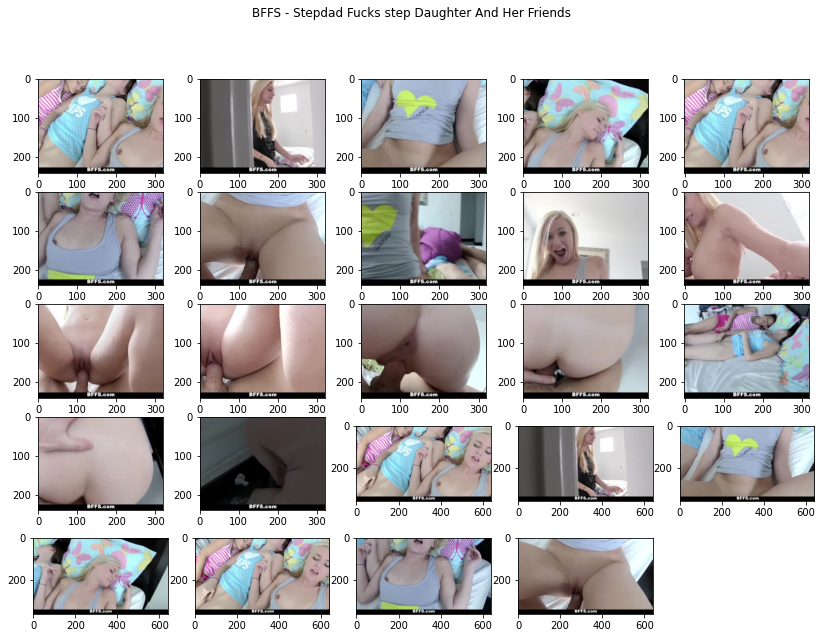

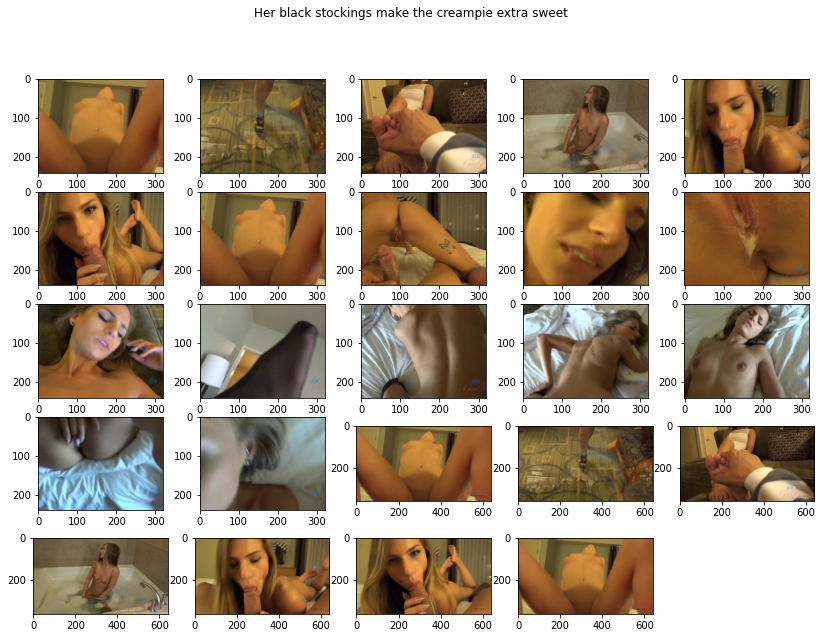

In [86]:
top5VideoThumbnailsInPopularWithWomenCategory = PopularWithWomenConnection.sort_values(by=['views'], ascending=False).head(5)
asyncio.run(reqMultipleImage(top5VideoThumbnailsInPopularWithWomenCategory))

#### Top 5 Videos That had The Highest Views In "Popular With Women" Category

In [87]:
HTML(''.join([row['embed'] for _, row in top5VideoThumbnailsInPopularWithWomenCategory.iterrows()]))

C:\Users\bigma\AppData\Roaming\Python\Python39\site-packages\IPython\core\display.py:724: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


#### What Kind of Tags Are Least Preferred In "Popular With Women" (Type Categories Sorted By Views)

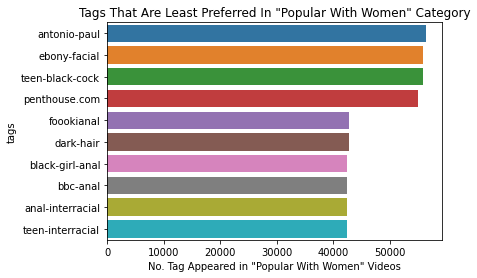

In [89]:
sortedPopularWithWomenTagCount = PopularWithWomenTagCount.sort_values(by=['views'],ascending=False).tail(10)
sortedPopularWithWomenTagCount = pd.DataFrame(sortedPopularWithWomenTagCount)
sortedPopularWithWomenTagCount.columns = ['No. Tag Appeared in "Popular With Women" Videos']
plot = sns.barplot(y=sortedPopularWithWomenTagCount.index, x=sortedPopularWithWomenTagCount['No. Tag Appeared in "Popular With Women" Videos']);
plot.set_title('Tags That Are Least Preferred In "Popular With Women" Category');